<a href="https://colab.research.google.com/github/WilkisterMbaka/Autolib-EDA-and-Hypotheses-Testing-/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2022_05_Wilkister_Mbaka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Autolib Dataset**

## **1.0 Defining the Question**

**a) Specifying the Question**


Stating my null hypothesis:

H0 : The is number cars taken on saturday is equal to the number of cars taken on sunday

H1 : The is number cars taken on saturday is not equal to the number of cars taken on sunday

**b) Defining the Metric for Success**

Drawing a conclusion from the hypothesis given

**c) Understanding the context**

Autolib' was an electric car sharing service which was inaugurated in Paris, France, in December 2011. It closed on 31 July 2018. Our dataset provides us with data from the autolib car service such as car usage information and aggregates of the different types of cars in the Autolib Company. It also provides information on charging slots per postal code. The data was from a period of six month, from the month of January, 2018 to June, 2018. 

**d) Recording the Experimental Design**

1. Defining the question
2. Data Loading
3. Data Understanding
4. Data Preparation
5. Data Analysis (EDA)
  * Univariate analysis
  * Bivariate analysis
6. Implementing the solution
  * Sampling
  * Hypotheses Testing
7. Challenging the solution
8. Follow up questions

## **2.0 Reading Data**

In [1]:
#importing Libraries

#importing pandas
import pandas as pd

# Importing Numpy
#
import numpy as np

# Importing Seaborn
#
import seaborn as sns

# Importing Matplotlib
#
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the Data from the source i.e. csv
#
df_glossary = pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')
df_glossary

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [3]:
# Loading the Data from the source i.e. csv
#
df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

## **3.0 Checking the Data**

In [4]:
# Determining the no. of records in our dataset
#
print(f'Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}')

Number of rows: 16085 
Number of columns: 13


In [5]:
# Previewing the top of our dataset
#
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [6]:
# Previewing the bottom of our dataset
# 
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [7]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [8]:
#Checking how many unique value are in a column
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [9]:
# Check for unique values in each column
for col in df.columns.to_list():
  print(f'{col} column unique values: \n')
  print(df[col].unique(), end='\n')
  print('**********')
  print('\n')

Postal code column unique values: 

[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]
**********


date column unique values: 

['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/2

**Observations**

*1. change the **date column** datatype from object to datetype*

## **4.0 Tidying the Dataset**

In [10]:
# Rename columns
df = df.rename(columns={'Postal code':'Postal_code'})
df.columns

Index(['Postal_code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [11]:
df.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [12]:
# dropping the unnecessary columns
df=df.drop(['Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum'],axis=1)
df.head(3)

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27


In [13]:
# Check for white spaces
print(df['day_type'].str.isspace().sum())
print(df['date'].str.isspace().sum())
print(df.columns.str.isspace().sum())

0
0
0


In [14]:
# Change date column from object to datetype
df['date'] = pd.to_datetime(df['date'])


In [15]:
# Check for duplicates
duplicate = df[df.duplicated()]

duplicate

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum


In [16]:
# Check for missing values in the dataset
df.isnull().sum()

Postal_code              0
date                     0
n_daily_data_points      0
dayOfWeek                0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
Slots_freed_sum          0
Slots_taken_sum          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

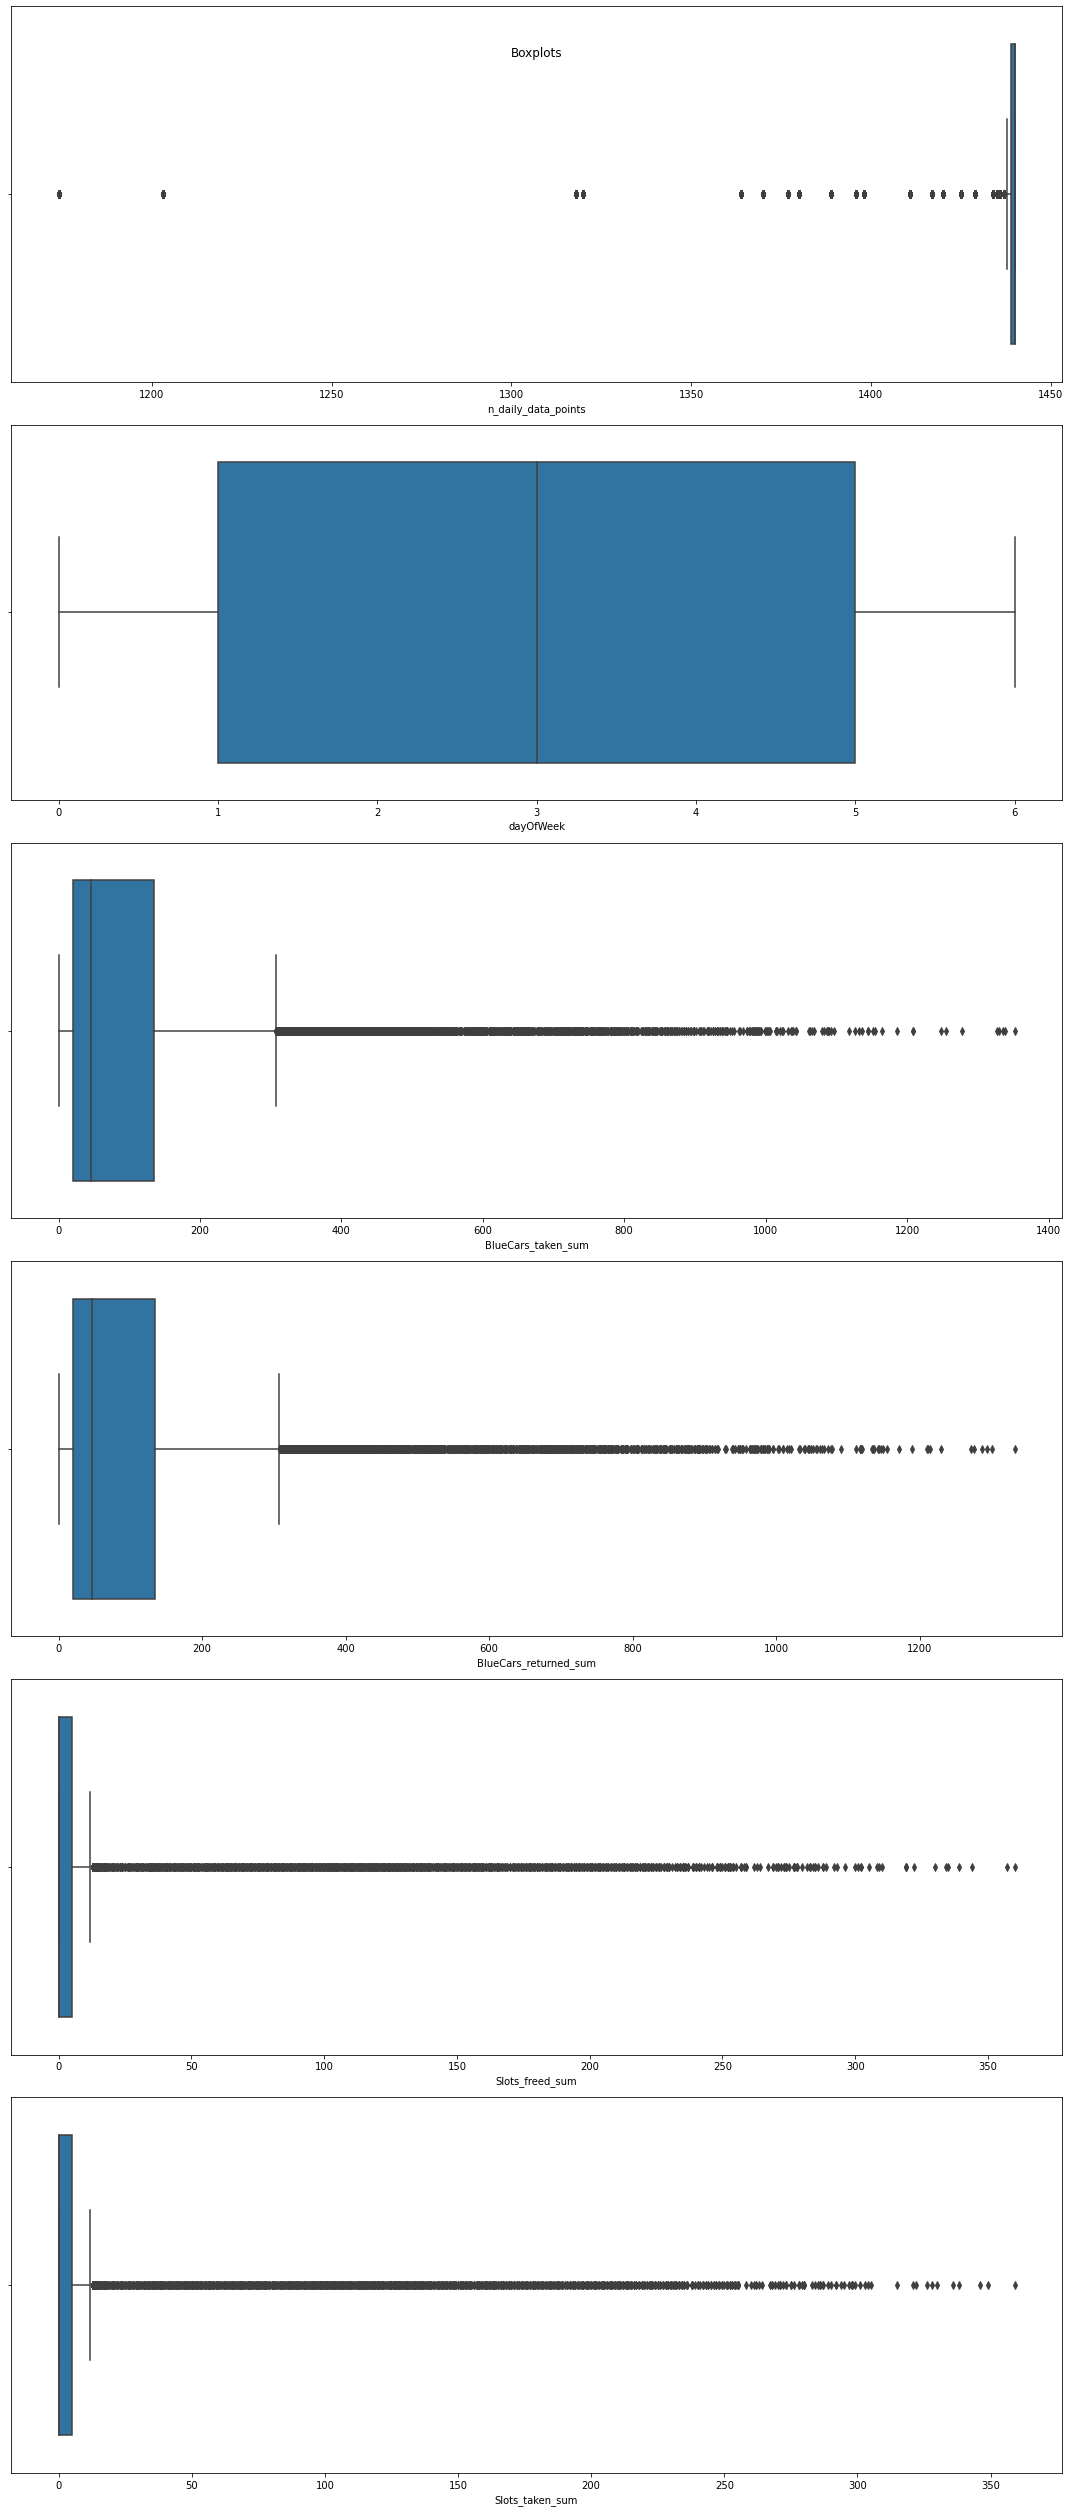

In [67]:
fig, (ax2, ax3, ax4, ax5, ax6, ax7)= plt.subplots(6,figsize=(15, 35))
fig.suptitle('Boxplots')
# sns.boxplot(df['Postal_code'], ax=ax1)
sns.boxplot(df['n_daily_data_points'], ax=ax2)
sns.boxplot(df['dayOfWeek'], ax=ax3)
sns.boxplot(df['BlueCars_taken_sum'], ax=ax4)
sns.boxplot(df['BlueCars_returned_sum'], ax=ax5)
sns.boxplot(df['Slots_freed_sum'], ax=ax6)
sns.boxplot(df['Slots_taken_sum'], ax=ax7)
plt.show()

In [48]:
# Have a month column
df['month'] = df['date'].dt.month_name().str[:3]

df.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum,day_type_encoded,month
0,75001,2018-01-01,1440,0,weekday,110,103,22,20,0,Jan
1,75001,2018-01-02,1438,1,weekday,98,94,23,22,0,Jan
2,75001,2018-01-03,1439,2,weekday,138,139,27,27,0,Jan
3,75001,2018-01-04,1320,3,weekday,104,104,25,21,0,Jan
4,75001,2018-01-05,1440,4,weekday,114,117,18,20,0,Jan


## **5.0 Exploratory Analysis**

### **5.1 Univariate Analysis**

In [18]:
num_attributes = df.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [19]:
#Central Tendency (Shows mean, median, mode etc)
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# concatenate
m = pd.concat( [ct1,ct2] ).T.reset_index()
m.columns = ( ['columns', 'mean', 'median'])
m

,columns,mean,median
0,Postal_code,88791.293876,92340.0
1,n_daily_data_points,1431.330619,1440.0
2,dayOfWeek,2.969599,3.0
3,BlueCars_taken_sum,125.926951,46.0
4,BlueCars_returned_sum,125.912714,46.0
5,Slots_freed_sum,22.629033,0.0
6,Slots_taken_sum,22.629282,0.0


In [20]:
#Central tendency - mode
print('Bluecars taken mode    : ', df.BlueCars_taken_sum.mode())
print('Bluecars returned mode : ', df.BlueCars_returned_sum.mode())
print('slots  freed mode      : ', df.Slots_freed_sum.mode())
print('slots  taken mode      : ', df.Slots_taken_sum.mode())

Bluecars taken mode    :  0    12
dtype: int64
Bluecars returned mode :  0    13
dtype: int64
slots  freed mode      :  0    0
dtype: int64
slots  taken mode      :  0    0
dtype: int64


In [21]:
# Dispersion - std, var, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.var ) ).T
d3 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d1, d4, d5] ).T.reset_index()
m.columns = ( ['columns', 'variance', 'range', 'std', 'skew', 'kurtosis'])
m

,columns,variance,range,std,skew,kurtosis
0,Postal_code,5.847820e+07,20879.0,7647.104280,-1.168778,-0.542143
1,n_daily_data_points,1.102972e+03,266.0,33.211018,-5.742776,36.594846
2,dayOfWeek,4.033331e+00,6.0,2.008316,0.018824,-1.260994
3,BlueCars_taken_sum,3.438088e+04,1352.0,185.420815,2.406355,6.172692
4,BlueCars_returned_sum,3.440868e+04,1332.0,185.495768,2.412085,6.186288
5,Slots_freed_sum,2.716353e+03,360.0,52.118643,2.597406,6.454514
6,Slots_taken_sum,2.719039e+03,359.0,52.144409,2.596904,6.442553


Text(0.5, 1.0, 'n_daily_data_points Histogram')

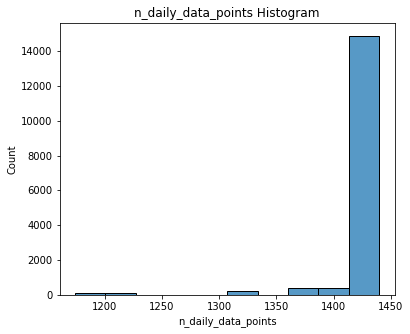

In [22]:
# Age distribution histogram
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(df['n_daily_data_points'], bins=10)

plt.title('n_daily_data_points Histogram')


Text(0.5, 1.0, 'dayOfWeek Histogram')

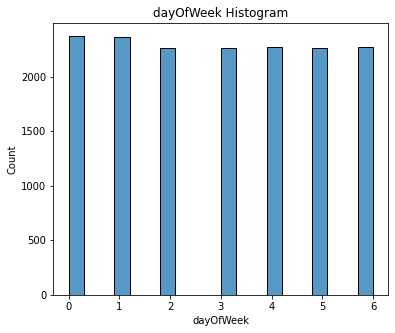

In [23]:
# Age distribution histogram
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(df['dayOfWeek'], bins=20)

plt.title('dayOfWeek Histogram')

Text(0.5, 1.0, 'BlueCars_taken_sum Histogram')

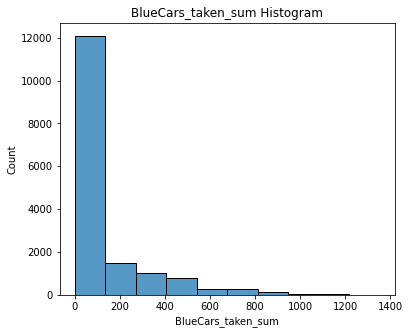

In [24]:
# Age distribution histogram
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(df['BlueCars_taken_sum'], bins=10)

plt.title('BlueCars_taken_sum Histogram')

Text(0.5, 1.0, 'BlueCars_returned_sum Histogram')

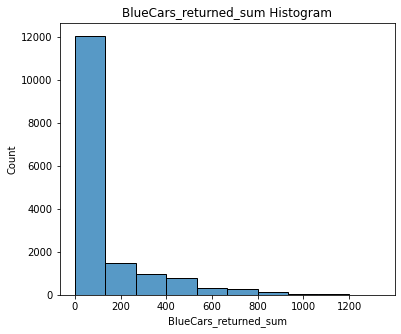

In [25]:
# Age distribution histogram
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(df['BlueCars_returned_sum'], bins=10)

plt.title('BlueCars_returned_sum Histogram')

Text(0.5, 1.0, 'Slots_freed_sum Histogram')

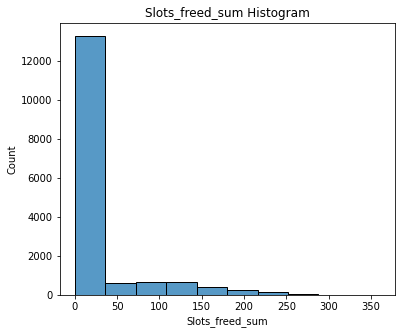

In [26]:
# Age distribution histogram
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(df['Slots_freed_sum'], bins=10)

plt.title('Slots_freed_sum Histogram')

Text(0.5, 1.0, 'Slots_taken_sum Histogram')

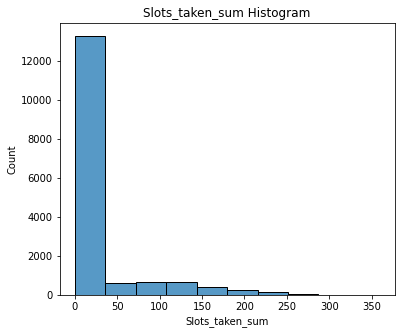

In [27]:
# Age distribution histogram
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(df['Slots_taken_sum'], bins=10)

plt.title('Slots_taken_sum Histogram')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


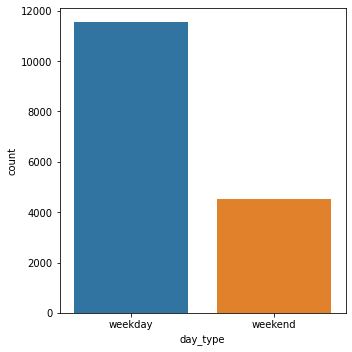

In [56]:
# Countplots
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

sns.countplot(df.day_type, x='day_type')

plt.show()

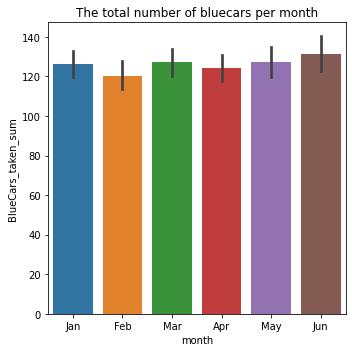

In [58]:
# The number of blue cars taken by month 
# fig, ax=plt.subplots(figsize=(8,6))
plt.title('The total number of bluecars per month')
sns.barplot(x='month',y='BlueCars_taken_sum',data=df)

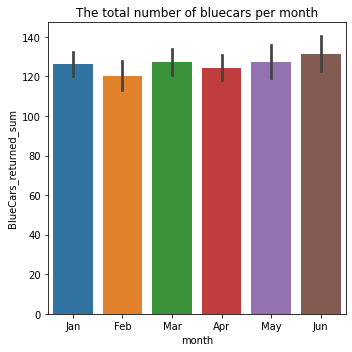

In [60]:
# The number of blue cars returned by month 
# fig, ax=plt.subplots(figsize=(8,6))
plt.title('The total number of bluecars per month')
sns.barplot(x='month',y='BlueCars_returned_sum',data=df)

In [29]:
#Frequency distribution table
df['dayOfWeek'].value_counts().sort_values(ascending=False)

0    2374
1    2363
6    2274
4    2271
2    2268
3    2268
5    2267
Name: dayOfWeek, dtype: int64

### **5.2 Bivariate Analysis**

In [30]:
df.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,18,20


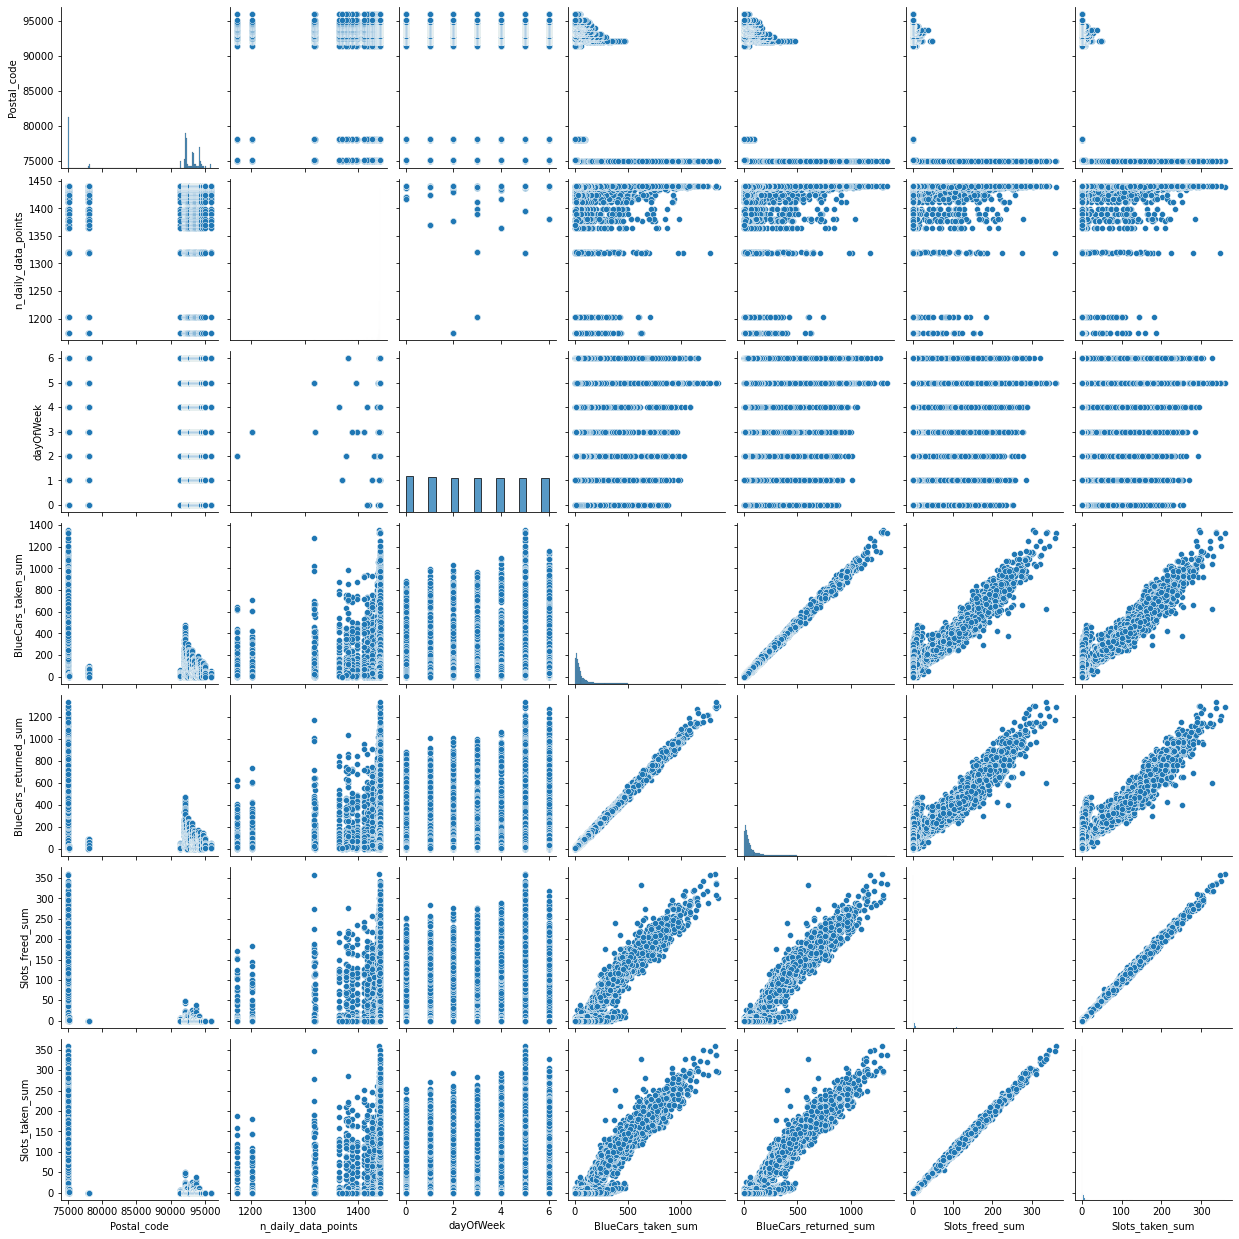

In [31]:
sns.pairplot(df)
plt.show()

In [32]:
# Convert categorical variables into numbers
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

df['day_type_encoded'] = lb.fit_transform(df['day_type'])
df.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum,day_type_encoded
0,75001,2018-01-01,1440,0,weekday,110,103,22,20,0
1,75001,2018-01-02,1438,1,weekday,98,94,23,22,0
2,75001,2018-01-03,1439,2,weekday,138,139,27,27,0
3,75001,2018-01-04,1320,3,weekday,104,104,25,21,0
4,75001,2018-01-05,1440,4,weekday,114,117,18,20,0


Text(0.5, 1.0, 'Correlation between All Features')

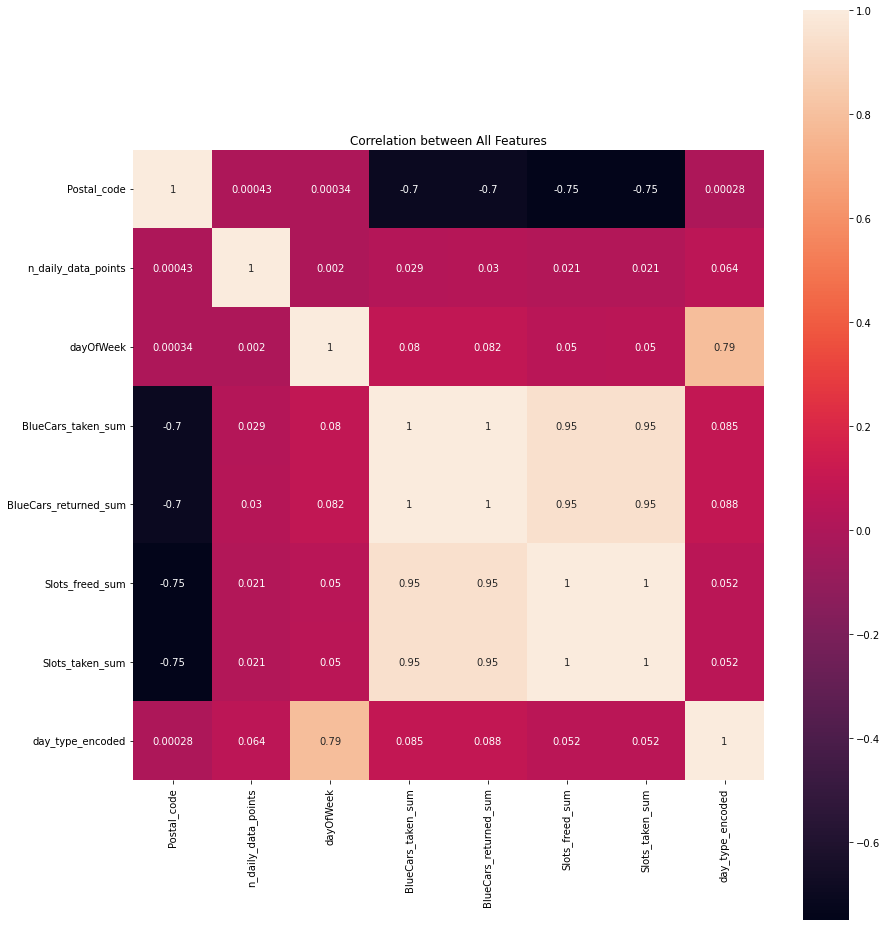

In [33]:
# Check correlation of all columns
plt.figure(figsize=(13,13))

sns.heatmap(df.corr(), square=True,annot=True)

plt.title('Correlation between All Features')

In [34]:
df

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum,day_type_encoded
0,75001,2018-01-01,1440,0,weekday,110,103,22,20,0
1,75001,2018-01-02,1438,1,weekday,98,94,23,22,0
2,75001,2018-01-03,1439,2,weekday,138,139,27,27,0
3,75001,2018-01-04,1320,3,weekday,104,104,25,21,0
4,75001,2018-01-05,1440,4,weekday,114,117,18,20,0
...,...,...,...,...,...,...,...,...,...,...
16080,95880,2018-06-15,1440,4,weekday,15,10,0,0,0
16081,95880,2018-06-16,1440,5,weekend,19,19,0,0,1
16082,95880,2018-06-17,1440,6,weekend,33,35,0,0,1
16083,95880,2018-06-18,1440,0,weekday,11,14,0,0,0


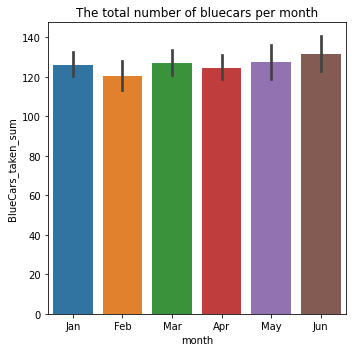

In [61]:
# The number of blue cars taken by month 
# fig, ax=plt.subplots(figsize=(8,6))
plt.title('The total number of bluecars per month')
sns.barplot(x='month',y='BlueCars_taken_sum',data=df)

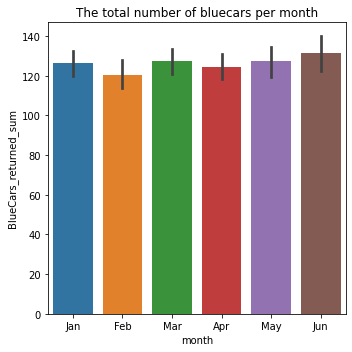

In [62]:
# The number of blue cars returned by month 
# fig, ax=plt.subplots(figsize=(8,6))
plt.title('The total number of bluecars per month')
sns.barplot(x='month',y='BlueCars_returned_sum',data=df)

### **5.3 Hypothesis Testing**


Stating my null hypothesis:

H0 : The is number cars taken on saturday is equal to the number of cars taken on sunday

H0: μ1 = μ2

H1 : The is number cars taken on saturday is not equal to the number of cars taken on sunday

H1 : μ1 ≠ μ2

Selecting the statistical test:

To test our study we will use 2 sample z-test

Choosing the signifance level:

our alpha = 0.05

In [35]:
df.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum,day_type_encoded
0,75001,2018-01-01,1440,0,weekday,110,103,22,20,0
1,75001,2018-01-02,1438,1,weekday,98,94,23,22,0
2,75001,2018-01-03,1439,2,weekday,138,139,27,27,0
3,75001,2018-01-04,1320,3,weekday,104,104,25,21,0
4,75001,2018-01-05,1440,4,weekday,114,117,18,20,0


In [36]:
# Filtering out the data and remaining with the weekend beecause it is the focus of our hypotheses
df_wknd =df[df['day_type']=='weekend']
df_wknd.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum,day_type_encoded
5,75001,2018-01-06,1437,5,weekend,187,185,38,35,1
6,75001,2018-01-07,1440,6,weekend,180,180,34,34,1
12,75001,2018-01-13,1440,5,weekend,224,223,38,38,1
13,75001,2018-01-14,1440,6,weekend,193,193,22,20,1
19,75001,2018-01-20,1439,5,weekend,217,217,41,39,1


In [37]:
df_wknd['dayOfWeek'].value_counts()


6    2274
5    2267
Name: dayOfWeek, dtype: int64

In [38]:
# sampling using stratified  data sampling on the day_of_week column
df_sample = df_wknd.groupby('dayOfWeek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

print(df_sample['dayOfWeek'].value_counts())

df_sample.head()

5    227
6    227
Name: dayOfWeek, dtype: int64


,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum,day_type_encoded
9979,93100,2018-01-13,1440,5,weekend,182,185,12,11,1
1430,75010,2018-01-27,1440,5,weekend,461,479,113,119,1
121,75001,2018-05-05,1440,5,weekend,207,207,40,39,1
2960,75019,2018-06-16,1440,5,weekend,694,656,166,162,1
9869,92800,2018-03-03,1440,5,weekend,84,86,10,9,1


In [39]:
# calculating mean of Saturday
mean_sat =df_wknd[df_wknd['dayOfWeek']==5]['BlueCars_taken_sum'].mean()
mean_sat

156.1243934715483

In [40]:
# calculating mean of Sunday
mean_sun=df_wknd[df_wknd['dayOfWeek']==6]['BlueCars_taken_sum'].mean()
mean_sun

146.0712401055409

In [63]:
#population squared standard deviation for Saturday

std_sat=(df[df['dayOfWeek']==5]['BlueCars_taken_sum'].std())**2
std_sat

52973.08248942666

In [64]:
#population squared standard deviation for Sunday
std_sun=(df[df['dayOfWeek']==6]['BlueCars_taken_sum'].std())**2
std_sun

42555.356999165204

In [43]:
#sample size for bluecars returned on Saturday
n_sat=df_wknd[df_wknd['dayOfWeek']==5].shape[0]
n_sat

2267

In [44]:
#sample size for bluecars returned on Sunday
n_sun=df_wknd[df_wknd['dayOfWeek']==6].shape[0]
n_sun

2274

2 sample test formula

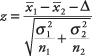

In [65]:
# calculating zscore
zscore= ((mean_sat-mean_sun)-0)/((std_sat/n_sat)+(std_sun/n_sun))**0.5
zscore

1.5497430680693733

Using an online calculator, we find the 

P-Value = 0.121214

significant level (0.05) > p-value (1.5497)

We fail to reject the null hypothesis